### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading dataset

In [2]:
df = pd.read_csv('data.csv')

### Inspect dataset

In [31]:
print('Top rows:')
print(df.head())

print('\nDataset info:')
print(df.info)

print('\nDataset description')
print(df.describe())

print('\nNot null values inspection')
print(df.isnull().sum())

Top rows:
   StudyHours ExtraParticipation  PapersPracticed  PreviousMarks  \
0           5                 No                2             69   
1           2                Yes                8             46   
2           7                Yes                5             56   
3           6                Yes                5             42   
4           7                 No                6             53   

   SleepingHours  PerformanceIndex  
0              8                51  
1              4                20  
2              7                46  
3              8                28  
4              4                41  

Dataset info:
<bound method DataFrame.info of       StudyHours ExtraParticipation  PapersPracticed  PreviousMarks  \
0              5                 No                2             69   
1              2                Yes                8             46   
2              7                Yes                5             56   
3              6            

### Convert ExtraParticipation (Yes/No) into numerical form using LabelEncoder.

In [6]:
label_encoder = LabelEncoder()
df['ExtraParticipation'] = label_encoder.fit_transform(df['ExtraParticipation'])

### Normalizing numerical columns to bring them to the same scale.

In [8]:
scaler = StandardScaler()
numerical_columns = ['StudyHours', 'PapersPracticed', 'PreviousMarks', 'SleepingHours']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Data Visualization (Heat map and Pair plot)

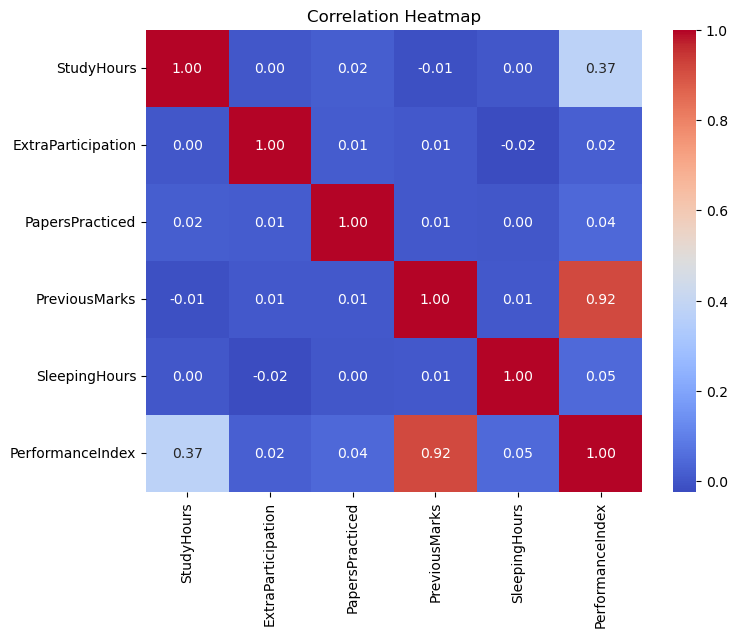

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Dataset splitting into training and testing sets.

In [40]:
X = df.drop(columns=['PerformanceIndex'])
y = df['PerformanceIndex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation

In [47]:
model = LinearRegression()

### Model Training

In [49]:
model.fit(X_train, y_train)

LinearRegression()

### Model prediction

In [52]:
y_pred = model.predict(X_test)

### Model evaluation

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4.41
R-squared: 0.99


### Prediction visualization

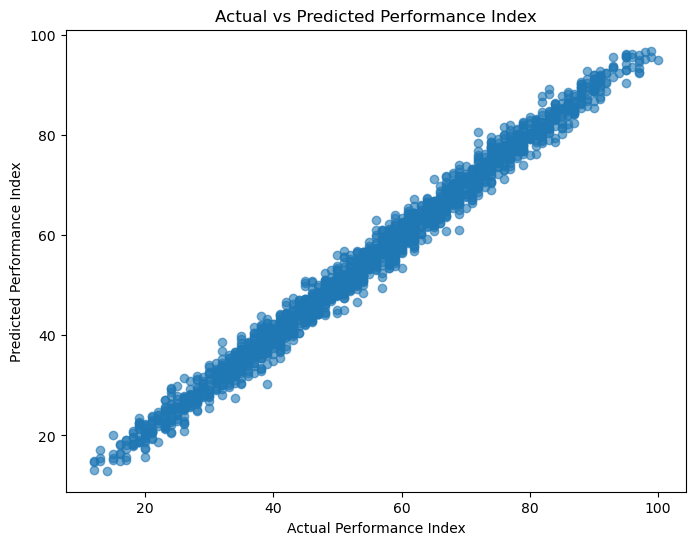

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()